# Домашнее задание "Продвинутая линейная алгебра".

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
# a) Диагональная, ортогональная, но не единичная(!)
r = np.radians(180)
M = np.array([[np.cos(r), 0, 0], [0, np.cos(r), 0], [0, 0, np.cos(r)]])
MT = np.transpose(M)
M.dot(MT)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [192]:
# b) Верхнетреугольная, ортогональная
M = np.array([[np.cos(r), np.sin(r), 0], 
              [0, np.cos(r), 0], 
              [0, 0, 1]], dtype = int)
MT = np.transpose(M)
M.dot(MT)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [206]:
# c) Нижнетреугольная, ортогональная
M = M = np.array([[np.cos(r), 0, 0, 0],
                  [ np.sin(r),np.cos(r), 0, 0], 
                  [0, 0, 1, 0],
                 [0, 0, 0, 1]], dtype = int)
MT = np.transpose(M)
M.dot(MT)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [156]:
# d) Матрица, у которой определитель = 1, и все элементы не равны 0
la.det(np.array([[0.96, -0.28], [0.28, 0.96]]))

1.0

Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [183]:
m = np.array([[2, 2],
              [1, 3]])
print(m)
la.eig(m)

[[2 2]
 [1 3]]


(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [239]:
m = np.array([[1, 2],
              [2,3]])
print(m)
# Найдём собственные занчения и вектора 
v, w = la.eigh(m)
print('Собственные значения') 
print(v, end = '\n \n')
print("Собственные вектора")
print(w, end = '\n \n')
d = np.diag(v)
print("Диагональная матрица")
print(d, end = '\n \n')
print('Ортогональная матрица из собственных векторов')
s = w.T
print(s, end = '\n \n')
print('Транспонированная ортогональная матрица из собственных векторов')
st = np.transpose(s)
print(st, end = '\n \n')
print('Проверка спектрального разложения')
np.dot(st, np.dot(d, s))

[[1 2]
 [2 3]]
Собственные значения
[-0.23606798  4.23606798]
 
Собственные вектора
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]
 
Диагональная матрица
[[-0.23606798  0.        ]
 [ 0.          4.23606798]]
 
Ортогональная матрица из собственных векторов
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]
 
Транспонированная ортогональная матрица из собственных векторов
[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]
 
Проверка спектрального разложения


array([[1., 2.],
       [2., 3.]])

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*





--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


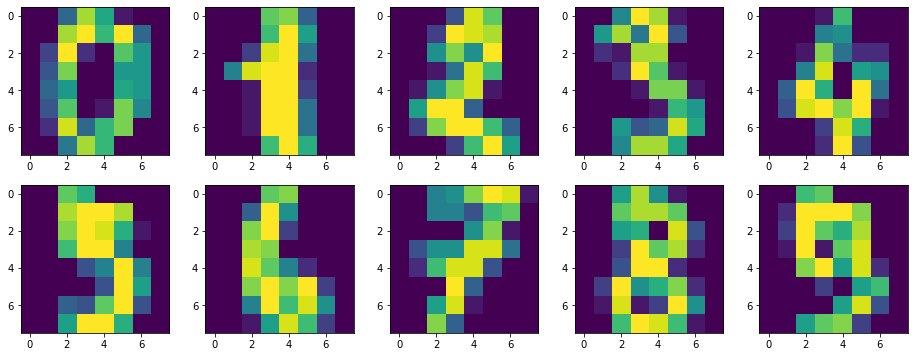

In [8]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import mean_squared_error
digits = datasets.load_digits()
X = digits.data
# y = digits.target
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

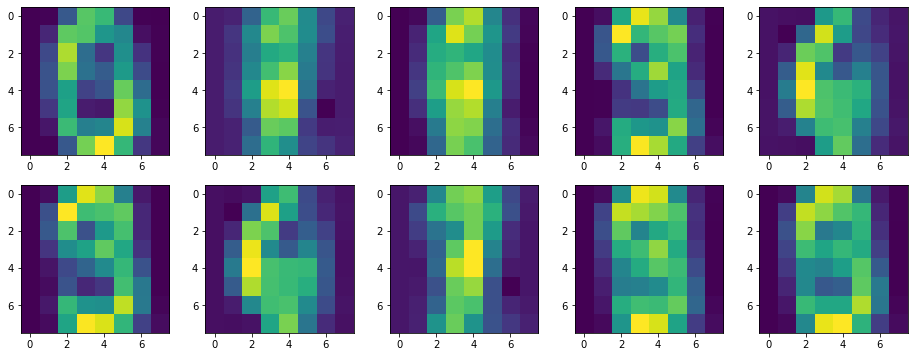

In [273]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X1 = pca.inverse_transform(X_reduced)
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X1[i,:].reshape([8,8]));

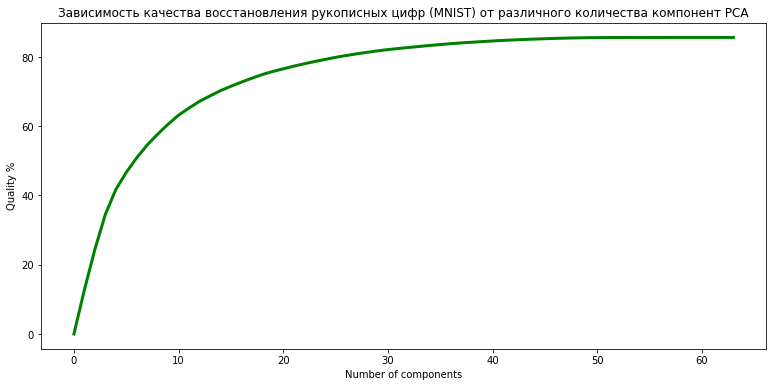

In [139]:
import pandas as pd
def mse(n):
        pca = decomposition.PCA(n_components=n)
        X_reduced = pca.fit_transform(X)
        X1 = pca.inverse_transform(X_reduced)
        MSE = mean_squared_error(X, X1)
        return MSE

df = pd.DataFrame([mse(n) for n in range(64)])
df['quality'] = abs(((df[0]-df[0][0]))/(df[0][63]))/(10**27)
plt.figure(figsize=(13,6))
plt.plot(df['quality'], color='g', lw=3)
plt.title('Зависимость качества восстановления рукописных цифр (MNIST) от различного количества компонент PCA')
plt.xlabel('Number of components')
plt.ylabel('Quality %')
plt.show();